## Lineare Regression

In [125]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [20]:
import geopandas as gpd
import pandas as pd

# Pfad zur GeoJSON-Datei angeben
file_path = "../_PROJEKT/safecycling/data/processed_data/simra_osm_all.geojson"

# GeoJSON-Datei einlesen
gdf = gpd.read_file(file_path)

gdf.head(2)

,id,type,score,incidents,rides,index_right,maxspeed,asphalt,concrete,paving_stone,...,highway_rare,living_street,path,primary,residential,secondary,service,tertiary,track,geometry
0,[100049].0,Street,0.0,0,138,57832.0,50,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.75,0.0,0.0,0.0,"POLYGON ((13.45412 52.54035, 13.45320 52.53977..."
1,[100069498].0,Junction,0.0,0,200,123443.0,30,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.00,0.0,0.0,0.0,"POLYGON ((13.52273 52.50704, 13.52248 52.50690..."


In [262]:
df = gdf.drop(columns=['id', 'index_right', 'geometry', 'markers', 'highway','type', 'incidents', 'rides'])

df.head(2)

,score,maxspeed,asphalt,concrete,paving_stone,sett,unpaved,cycleway,footway,highway_rare,living_street,path,primary,residential,secondary,service,tertiary,track
0,0.0,50,0.0,1.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.75,0.0,0.0,0.0
1,0.0,30,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.00,0.0,0.0,0.0


### Scatterplot erstellen

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

#### alle Features als Scatterplot

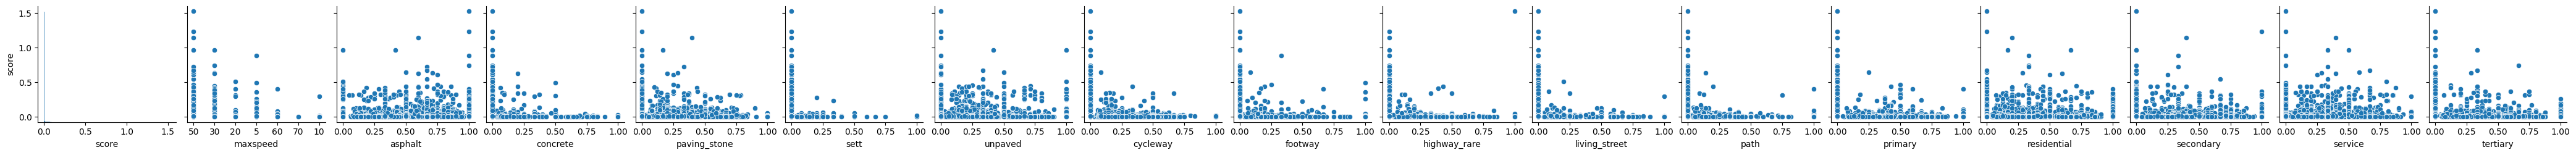

In [35]:
sns.pairplot(df, x_vars=df.columns[:-1], y_vars=['score'], kind='scatter')
plt.show()

#### Feature 'Service' mit Trendlinie als Scatterplot

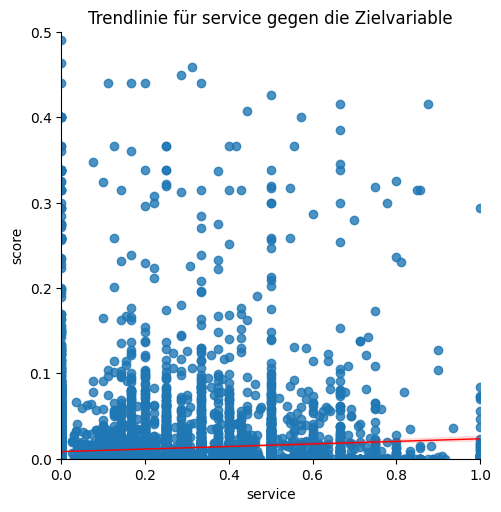

In [190]:
feature = 'service'  

# lmplot erstellen und die Trendlinie umfärben
sns.lmplot(x=feature, y='score', data=df, 
           line_kws={'color': 'red', 'linewidth': 1})  

# Achsenbereich anpassen (Ausschnitt)
plt.xlim(0, 1.0)  
plt.ylim(0, 0.5) 

plt.title(f'Trendlinie für {feature} gegen die Zielvariable')
plt.show()

#### Median bestimmen

Der Median bietet eine **robuste Alternative zum Mittelwert**, insbesondere in der linearen Regression, wo Ausreißer vorhanden sein können. Modelle, die den Median vorhersagen, minimieren die Abweichungen zu einem zentralen Punkt der Verteilung und sind dadurch weniger anfällig für Verzerrungen durch extreme Werte. Dies ist besonders nützlich in Szenarien, in denen die Verteilung der Zielvariablen stark asymmetrisch ist.

In [151]:
# Angenommen, du hast Vorhersagen für eine Gruppe von Datenpunkten
predictions = ridge_reduced.predict(X_test_reduced)

# Berechnung des Medians der Vorhersagen
median_prediction = np.median(predictions)
print(f'Median der Vorhersagen: {median_prediction}')

Median der Vorhersagen: 0.010447589760796818


#### Arithmetisches Mittel der Vorhersagen berechnen

In [154]:
# Berechnung des arithmetischen Mittels der Vorhersagen
mean_prediction = np.mean(predictions)
print(f'Arithmetisches Mittel der Vorhersagen: {mean_prediction}')

Arithmetisches Mittel der Vorhersagen: 0.010426242937735291


**Feststellung:** Beide Werte sind ähnlich. Die Verteilung der Vorhersagen ist daher wahrscheinlich symmetrisch.

#### Boxplot für alle Features - um Ausreißer zu erkennen --> SINNVOLL??????

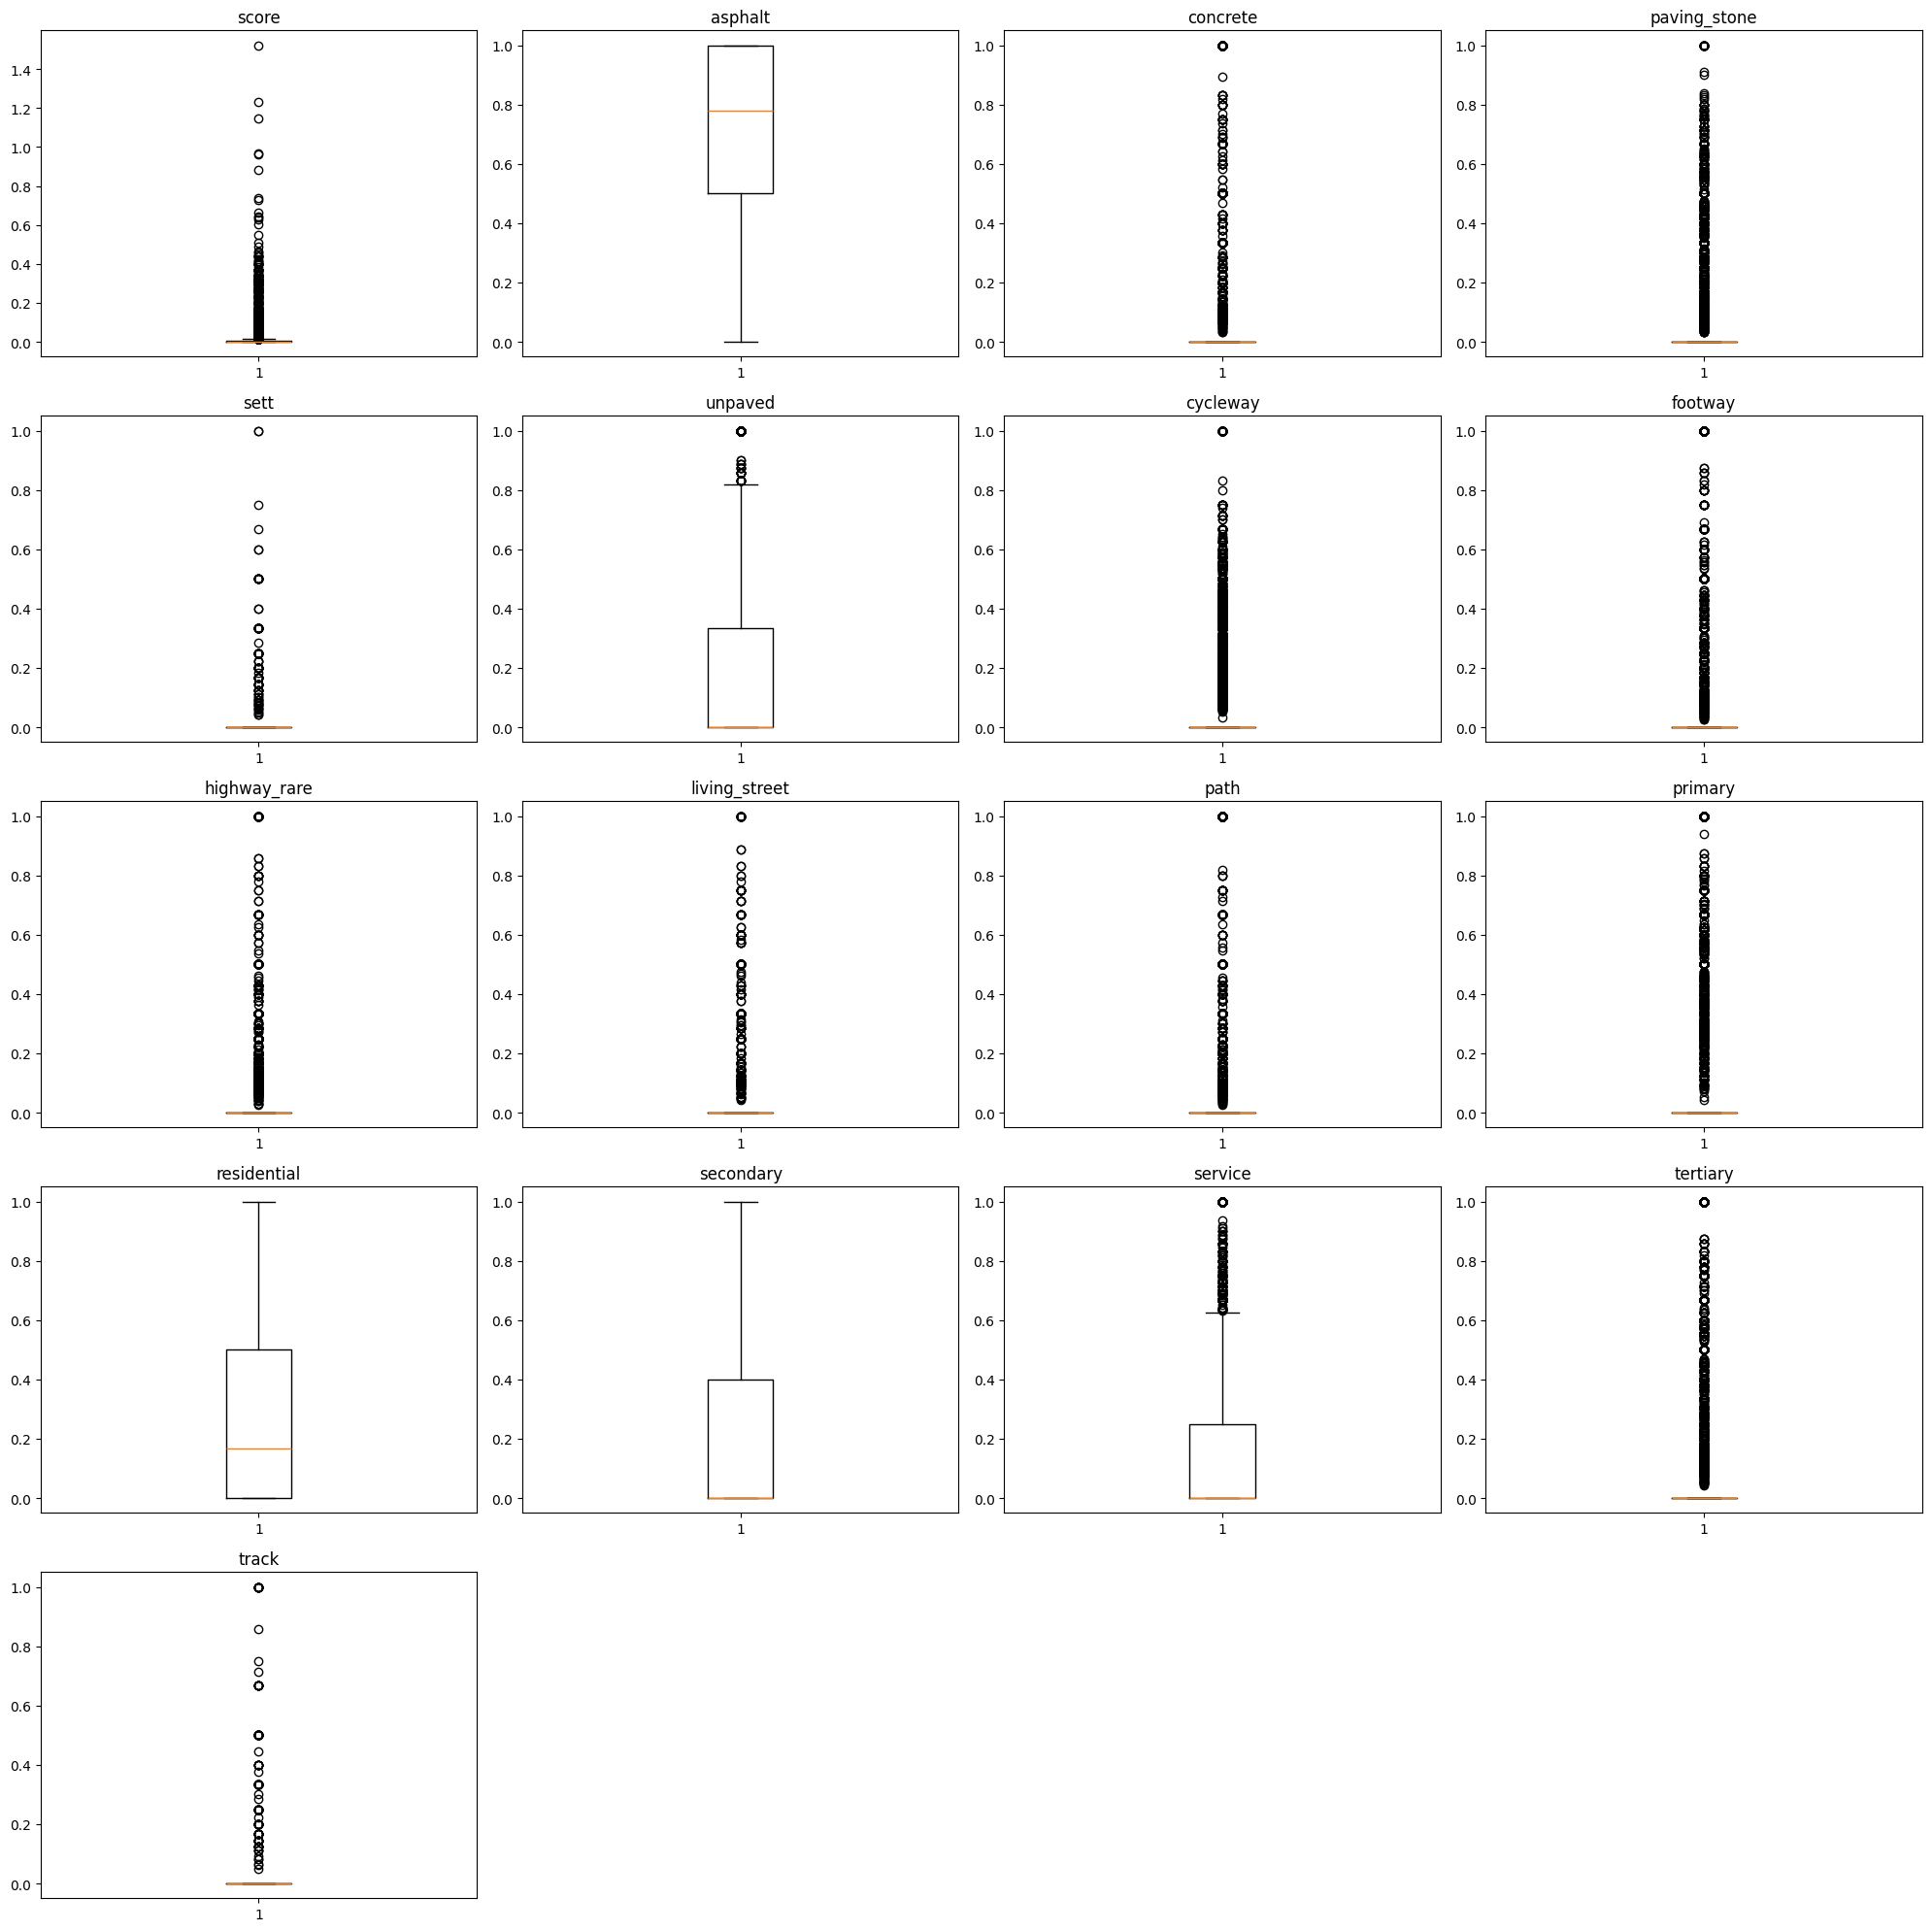

In [185]:
# Filtern der numerischen Spalten
numerical_cols = df.select_dtypes(include=['number']).columns

# Boxplots für alle numerischen Features
plt.figure(figsize=(20, 20))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(5, 4, i)  # Dimensionen für das Subplot-Gitter anpassen
    plt.boxplot(df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

### StandardScaler

Standardisiere oder normalisiere der Features, besonders wenn sie auf sehr unterschiedlichen Skalen liegen. Dies kann die Konvergenz des Modells verbessern und numerische Probleme verhindern.

In [263]:
from sklearn.preprocessing import StandardScaler

In [264]:
# Initialisieren des StandardScalers
scaler = StandardScaler()

# Anpassung des Scalers an die Trainingsdaten und Transformation
X_train_scaled = scaler.fit_transform(X_train)

# Anwendung des Scalers auf die Testdaten
X_test_scaled = scaler.transform(X_test)

# Initialisieren des linearen Regressionsmodells
model = LinearRegression()

# Trainieren des Modells
model.fit(X_train_scaled, y_train)

# Vorhersagen auf den Testdaten
y_pred = model.predict(X_test_scaled)

# Ergebnis ausgeben
print("Vorhergesagte Werte:", y_pred)

Vorhergesagte Werte: [0.01666304 0.00702637 0.00953167 ... 0.00739449 0.0122467  0.01384067]


### Min-Max-Scaler

Der Min-Max-Scaler skaliert die Daten so, dass sie in einem definierten Bereich liegen, typischerweise zwischen 0 und 1.

In [192]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Definieren der Preprocessing-Schritte
preprocessor_mms = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), ['maxspeed', 'asphalt', 'concrete', 
                                 'paving_stone', 'sett', 'unpaved', 
                                 'cycleway', 'footway', 'highway_rare', 
                                 'living_street', 'path', 'primary', 
                                 'residential', 'secondary', 
                                 'tertiary', 'track'])
    ])


#### Erstellen der Pipeline

In [ ]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_mms),  # Preprocessing-Schritte
    ('lr', LinearRegression())    # Lineares Regressionsmodell
])

#### Aufteilen in Trainings- und Testdaten

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Anwenden des Preprocessors auf die Trainingsdaten

In [193]:
preprocessor_mms.fit(X_train)  

ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                 ['maxspeed', 'asphalt', 'concrete',
                                  'paving_stone', 'sett', 'unpaved', 'cycleway',
                                  'footway', 'highway_rare', 'living_street',
                                  'path', 'primary', 'residential', 'secondary',
                                  'tertiary', 'track'])])

#### transformieren

In [ ]:
X_train_transformed = preprocessor_mms.transform(X_train)

#### Überprüfen der Form der transformierten Daten

In [194]:
print("Form der transformierten Daten:", X_train_transformed.shape)

Form der transformierten Daten: (12529, 16)


#### Erstellen der Spaltennamen für die transformierten Daten

In [195]:
columns = [f"feature_{i}" for i in range(X_train_transformed.shape[1])]

#### In einen DataFrame konvertieren und Ausgabe der transformierten Daten

In [ ]:
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=columns)

print(X_train_transformed_df)

#### Trainieren des Modells

In [203]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['maxspeed', 'asphalt',
                                                   'concrete', 'paving_stone',
                                                   'sett', 'unpaved',
                                                   'cycleway', 'footway',
                                                   'highway_rare',
                                                   'living_street', 'path',
                                                   'primary', 'residential',
                                                   'secondary', 'tertiary',
                                                   'track'])])),
                ('lr', LinearRegression())])

#### Vorhersagen auf den Testdaten

In [197]:
y_pred = pipeline.predict(X_test)

#### Ausgabe

In [198]:
"Vorhergesagte Werte:", y_pred

('Vorhergesagte Werte:',
 array([0.01662922, 0.0070343 , 0.00975895, ..., 0.00733852, 0.01222992,
        0.01380825]))

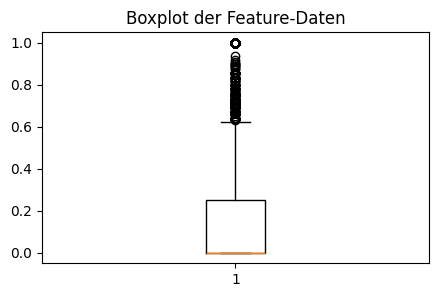

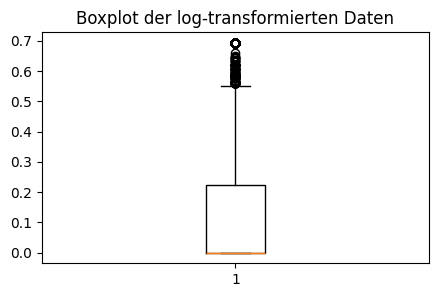

In [201]:
# Boxplot erstellen
plt.figure(figsize=(5, 3))
plt.boxplot(df['service'])
plt.title('Boxplot der Feature-Daten')
plt.show()

# Log-Transformation anwenden
df['log_service'] = np.log1p(df['service'])

# Boxplot nach Transformation
plt.figure(figsize=(5, 3))
plt.boxplot(df['log_service'])
plt.title('Boxplot der log-transformierten Daten')
plt.show()

#### Train-Test-Fehler vergleichen

In [209]:
# Modell instanziieren
lr = LinearRegression()

# Modell auf den Trainingsdaten fitten
lr.fit(X_train, y_train)

LinearRegression()

In [210]:
from sklearn.metrics import mean_squared_error

# Vorhersagen auf Trainings- und Testdaten
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Fehler berechnen
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Trainings-MSE:", train_mse)
print("Test-MSE:", test_mse)


Trainings-MSE: 0.0017459612881715316
Test-MSE: 0.002223628408681947


**Bewertung:**
Werte geben Hinweise auf die Leistung und Robustheit des Modells.

**Trainings-MSE von 0.00175:** Der kleiner Wert deutet darauf hin, dass das Modell die Trainingsdaten sehr gut vorhersagt.

**Test-MSE von 0.00222:** Der Wert ist etwas höher als der Trainings-MSE, was normal ist, da das Modell auf den Trainingsdaten oft besser abschneidet.

**Fazit:** Die geringe Differenz der Werte deutet darauf hin, dass Ihr Modell gut generalisiert und nicht stark über- oder unterfitten ist. Ein gutes Zeichen dafür, dass Ihr Modell stabil und robust ist.

### Koeffizienten

#### Zielvariable festlegen

In [269]:
# Zielvariable 
y = df['score']

# Alle anderen Spalten als Features verwenden 
X = df.drop(columns=['score'])

In [270]:
# Split und Fit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

#### Vorhersagen mit dem Testdatensatz

In [271]:
y_pred = lr.predict(X_test)

#### Ausgabe der Koeffizienten und des Achsenabschnitts (Intercept)

In [215]:
print("Koeffizienten:", lr.coef_)
print("Achsenabschnitt (Intercept):", lr.intercept_)

Koeffizienten: [-7.59224907e-06 -1.90400346e-03 -7.55983664e-03  7.70902095e-03
 -4.24495561e-03  5.99977476e-03 -5.39698543e-03 -4.06414415e-03
 -6.89209414e-03 -3.47185762e-03 -4.83039030e-03  2.63628770e-03
  3.09928607e-03  7.34635851e-03  1.20629371e-02  9.71471641e-03
 -1.02041142e-02]
Achsenabschnitt (Intercept): 0.006371735186350949


**Koeffizienten:** Diese Werte repräsentieren die Steigungen der einzelnen Prädiktoren (also die Einflussfaktoren) in deinem Modell. In einer linearen Regression werden die Koeffizienten verwendet, um den Einfluss jeder unabhängigen Variable auf die abhängige Variable zu quantifizieren.

Hier 16 Koeffizienten, Modell hat 16 Prädiktoren. Jeder Koeffizient gibt an, wie stark und in welche Richtung sich die abhängige Variable ändert, wenn sich der entsprechende Prädiktor um eine Einheit ändert.

**Achsenabschnitt (Intercept):** Punkt, an dem die Regressionsgerade die y-Achse schneidet, wenn alle Prädiktoren den Wert 0 haben. 

In [61]:
df.columns

Index(['score', 'maxspeed', 'asphalt', 'concrete', 'paving_stone', 'sett',
       'unpaved', 'cycleway', 'footway', 'highway_rare', 'living_street',
       'path', 'primary', 'residential', 'secondary', 'service', 'tertiary',
       'track'],
      dtype='object')

In [272]:
# if hasattr(model, 'feature_names_in_'):
    # for i in range(17):
        # wie viele Tabs verwendet werden sollen
        # if len(model.feature_names_in_[i]) < 6:  # basierend auf der Länge des Feature-Namens
           # print(f"{model.feature_names_in_[i]}:\t\t{model.coef_[i]}")
        # else:
            # print(f"{model.feature_names_in_[i]}:\t{model.coef_[i]}")
# else:
    # print("Das Modell hat keine Feature-Namen.")


# Namen des Features mit Ausgabe des Koeffizienten
print(feature_names[0], ", Koeffizient:", lr.coef_[0])
print(feature_names[1], ", Koeffizient:", lr.coef_[1])
print(feature_names[2], ", Koeffizient:", lr.coef_[2])
print(feature_names[3], ", Koeffizient:", lr.coef_[3])

score , Koeffizient: -7.592249069335139e-06
maxspeed , Koeffizient: -0.00190400345852386
asphalt , Koeffizient: -0.007559836636002463
concrete , Koeffizient: 0.007709020946083526


#### ??? Warum weichen die Daten hier von den oberen Koeeffizienten ab!? andere Reihenfolge

#### Bewertung des Modells

In [109]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 0.002223628408681947
Root Mean Squared Error (RMSE): 0.04715536458009785
R^2 Score: -0.0009708470614007148


## Interpretation:

#### **Koeffizienten (model.coef_):** 
Diese zeigen die Gewichtung der jeweiligen Features.
  Jeder Koeffizient zeigt an, wie stark sich die Zielvariable (y) ändert, wenn sich der entsprechende Feature-Wert (X) um eine Einheit verändert, während alle anderen Features konstant gehalten werden.
  - **Positive Koeffizienten:** Ein positiver Koeffizient zeigt, dass ein Anstieg des Features um eine Einheit zu einem Anstieg der Zielvariable führt.
  - **Negative Koeffizienten:** Ein negativer Koeffizient zeigt, dass ein Anstieg des Features um eine Einheit zu einem Rückgang der Zielvariable führt.
 
> Die Koeffizienten helfen zu verstehen, welche Features einen Einfluss auf die Zielvariable haben und in welche Richtung dieser Einfluss geht (positiv oder negativ). Je größer der absolute Wert eines Koeffizienten, desto stärker ist der Einfluss des entsprechenden Features auf die Zielvariable.
>
> **HIER: Die Koeffizienten sind hier sehr klein, was darauf hinweisen könnte, dass die Variablen möglicherweise nicht stark mit der Zielvariable korrelieren.**
 
#### **Achsenabschnitt (Intercept)**
Der Achsenabschnitt (model.intercept_) ist der Wert der Zielvariable, wenn alle Features gleich null sind. Im Modell beträgt der Achsenabschnitt etwa 0.006371735186350949.
Dies bedeutet, dass, wenn alle Werte der Features auf 0 gesetzt werden, der Wert der Zielvariable auf 0.00637 geschätzt wird.

> Der Achsenabschnitt gibt den Basiswert der Zielvariable an, wenn alle Features keinen Einfluss haben (d.h., ihre Werte sind null).
    

**Es ist auch nützlich, die Koeffizienten im Vergleich zur Größe und Einheit der Features zu betrachten.**
  
#### **Intercept (model.intercept_):**
Der Schnittpunkt der Regressionslinie mit der y-Achse.

  
#### **Mean Squared Error (MSE):** 
Zeigt den durchschnittlichen Fehler des Modells.

**Wert: 0.002223628408681947**

Ein niedrigerer MSE zeigt an, dass die Vorhersagen des Modells näher an den tatsächlichen Werten liegen. In Modell ist der MSE relativ klein, was darauf hinweist, dass die Vorhersagen des Modells nicht sehr weit von den tatsächlichen Werten entfernt sind.

#### **R²-Score:** 
Zeigt an, wie gut das Modell die Daten erklärt (Wert zwischen 0 und 1, wobei 1 eine perfekte Erklärung bedeutet).

**Wert: -0.0009708470614007148**

Ein R²-Wert von -0.00097 ist negativ, was darauf hinweist, dass das Modell schlechter ist als ein einfaches Mittelwert-Modell (d.h., ein Modell, das nur den Mittelwert der Zielvariable vorhersagt). Ein negativer R²-Wert bedeutet oft, dass das Modell nicht gut funktioniert und möglicherweise einige Verbesserungen benötigt.

### TRAININGSDATEN

#### Relative Fehlergröße - Normalisierung durch Mittelwert

#### Mittelwert

Normalisierung von MSE kann dabei helfen, die Fehlergröße in Relation zu den Zielvariablen zu interpretieren

In [217]:
mean_y = y_test.mean()
normalized_train_mse = train_mse / mean_y
normalized_test_mse = test_mse / mean_y
print("Normalisierter Trainings-MSE:", normalized_train_mse)
print("Normalisierter Test-MSE:", normalized_test_mse)

Normalisierter Trainings-MSE: 0.16772450052314214
Normalisierter Test-MSE: 0.2136112448322553


#### RMSE

RMSE und MAE sind oft intuitiver in Bezug auf die tatsächlichen Fehlergrößen

In [222]:
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print("Trainings-RMSE:", train_rmse)
print("Test-RMSE:", test_rmse)

Trainings-RMSE: 0.04178470160443331
Test-RMSE: 0.04715536458009785


#### R²

R²-Score bietet zusätzlich einen guten Überblick darüber, wie gut das Modell die Varianz erklärt.

In [224]:
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Trainings-R²-Score:", train_r2)
print("Test-R²-Score:", test_r2)

Trainings-R²-Score: 0.01175695380466002
Test-R²-Score: -0.0009708470614007148


### CrossValidation und k-Fold

In [230]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

In [227]:
# Anzahl der Folds für die Cross-Validation
k = 5


In [228]:
# KFold Cross-Validation einrichten
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [231]:
# Definieren eines Scorers für den Mean Squared Error
mse_scorer = make_scorer(mean_squared_error)

In [232]:
# Cross-Validation durchführen
cv_scores = cross_val_score(pipeline, X, y, cv=kf, scoring=mse_scorer)

In [233]:
# Ergebnisse ausgeben
print(f"Mean Squared Error für jedes Fold: {cv_scores}")
print(f"Durchschnittlicher MSE über alle Folds: {np.mean(cv_scores)}")
print(f"Standardabweichung des MSE über alle Folds: {np.std(cv_scores)}")

Mean Squared Error für jedes Fold: [0.00222363 0.00164203 0.00136483 0.00233496 0.00166844]
Durchschnittlicher MSE über alle Folds: 0.001846780633416701
Standardabweichung des MSE über alle Folds: 0.00037049744267267967


#### Boxplot der MSE-Werte
Visualisiert die Verteilung der MSE-Werte über alle Folds und zeigt Ausreißer und die zentrale Tendenz.

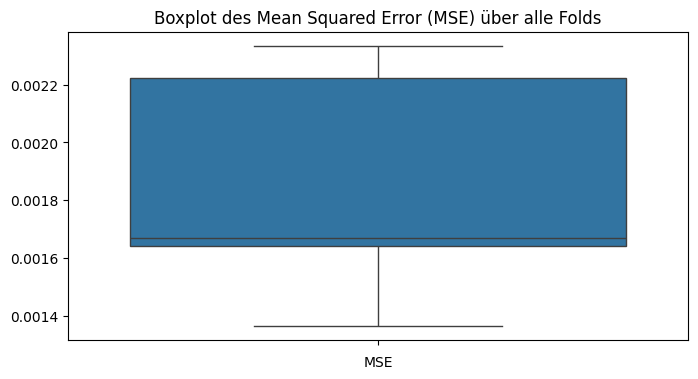

In [237]:
plt.figure(figsize=(8, 4))
sns.boxplot(cv_scores)
plt.title('Boxplot des Mean Squared Error (MSE) über alle Folds')
plt.xlabel('MSE')
plt.show()

#### Diagramm des MSEs für jedes Fold
Zeigt die MSE-Werte für jeden Fold an und hilft, die Konsistenz der Modellleistung über die verschiedenen Folds hinweg zu überprüfen.

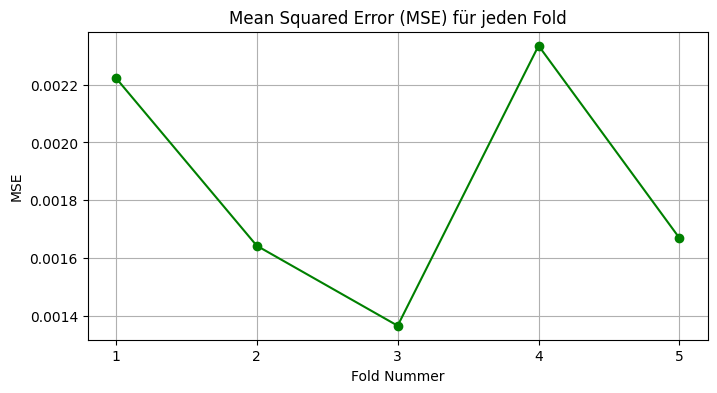

In [265]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, k+1), cv_scores, marker='o', linestyle='-', color='g')
plt.title('Mean Squared Error (MSE) für jeden Fold')
plt.xlabel('Fold Nummer')
plt.ylabel('MSE')
plt.xticks(range(1, k+1))
plt.grid(True)
plt.show()

#### Histogramm der MSE-Werte
Visualisiert die Verteilung der MSE-Werte, um zu sehen, wie häufig bestimmte Fehlerwerte auftreten.

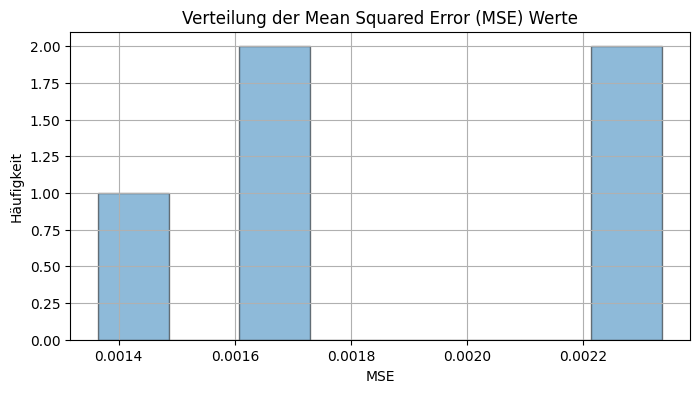

In [255]:
plt.figure(figsize=(8, 4))
plt.hist(cv_scores, bins=8, edgecolor='k', alpha=0.5)
plt.title('Verteilung der Mean Squared Error (MSE) Werte')
plt.xlabel('MSE')
plt.ylabel('Häufigkeit')
plt.grid(True)
plt.show()

#### Range

### Ridge Regression (L2-Regularisierung): 
eine L2-Regularisierung hinzufügen, um die Koeffizienten des Modells zu verkleinern und Overfitting zu vermeiden.

In [113]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

Ridge()

#### Vorhersagen auf Testdaten durchführen

In [121]:
y_pred = ridge.predict(X_test)

#### Modellbewertung

In [256]:
# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# R² Score
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')


Root Mean Squared Error (RMSE): 0.04715536458009785
Mean Absolute Error (MAE): 0.01537979265205098
R² Score: -0.0009708470614007148


## XXXXX AUSWERTUNG ^

### Residualanalyse
Analysiere die Residuen, um zu prüfen, ob das Modell die Annahmen der linearen Regression erfüllt (z.B. keine systematischen Muster in den Fehlern).

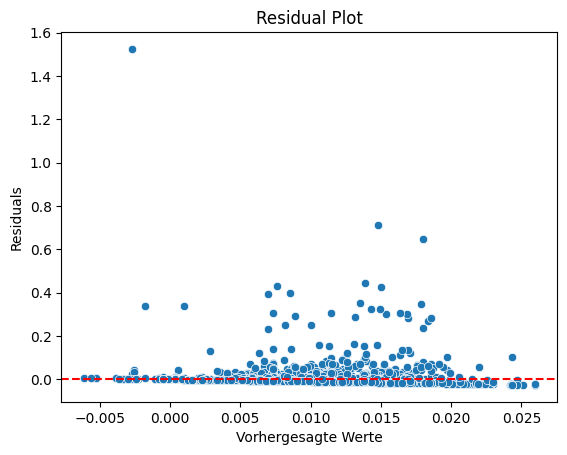

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_pred

# Residualplot
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Vorhergesagte Werte')
plt.ylabel('Residuals')
plt.show()


## CrossValidation (CV)

In [102]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [116]:
# Zielvariable 
y = df['score']

# Alle anderen Spalten als Features verwenden 
X = df.drop(columns=['score'])

In [117]:
from sklearn.model_selection import KFold

In [257]:
# Erstelle das Modell
lr = LinearRegression()

# Anzahl der Folds 
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-Validation anwenden
scores = cross_val_score(lr, X, y, cv=kf, scoring='neg_mean_squared_error')

# Da `cross_val_score` die negativen MSE-Werte zurückgibt, multiplizieren wir mit -1, um positive Werte zu erhalten
mse_scores = -scores

# Berechne die durchschnittliche MSE und den R^2-Score
mean_mse = np.mean(mse_scores)
print(f"Durchschnittlicher Mean Squared Error (MSE): {mean_mse}")

# Berechne den Durchschnitt der R^2-Scores
r2_scores = cross_val_score(lr, X, y, cv=kf, scoring='r2')
mean_r2 = np.mean(r2_scores)
print(f"Durchschnittlicher R^2-Score: {mean_r2}")

Durchschnittlicher Mean Squared Error (MSE): 0.0018459070262730015
Durchschnittlicher R^2-Score: 0.007287483335216094


#### **Durchschnittlicher Mean Squared Error (MSE)**

**Wert: 0.0018459070262730015**

Ein MSE von 0.0018 ist relativ niedrig, was darauf hindeutet, dass das Modell im Durchschnitt relativ gute Vorhersagen macht. Der MSE ist jedoch stark von der Skala der Zielvariable abhängig. 

#### **Durchschnittlicher R²-Score**

**Wert: 0.007287483335216094**

Ein R²-Score von 0.0073 ist sehr niedrig, was darauf hindeutet, dass das Modell nur einen sehr geringen Anteil der Variabilität in den Zielwerten erklärt. 

Dies könnte bedeuten, dass das Modell entweder: **Schlecht auf die Daten passt** - Das Modell ist möglicherweise nicht geeignet oder hat nicht genügend Kapazität, um die Zielvariable gut zu erklären. **Features unzureichend sind**.

In [19]:
print(X.shape)
print(y.shape)

(15662, 21)
(15662,)


### Hyperparameter-Tuning: 
Nutze Grid Search, um die besten Werte für Regularisierungsparameter wie alpha in Ridge zu finden.

In [258]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.1, 1.0, 10.0]}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.1, 1.0, 10.0]},
             scoring='neg_mean_squared_error')

#### Beste Parameter und Modellleistung abrufen

In [259]:
# Beste Parameter
best_alpha = grid_search.best_params_['alpha']
print(f'Bestes alpha: {best_alpha}')

# Beste Modellleistung (negativer MSE; wir machen ihn positiv)
best_score = -grid_search.best_score_
print(f'Bester RMSE im Cross-Validation: {best_score ** 0.5}')

Bestes alpha: 10.0
Bester RMSE im Cross-Validation: 0.041821902058664026


#### Das beste Modell auf Testdaten anwenden
Nutze das Modell mit den besten Hyperparametern, das GridSearchCV gefunden hat, um Vorhersagen auf den Testdaten zu machen und die Leistung zu bewerten.

In [260]:
# Vorhersagen auf Testdaten mit dem besten Modell
y_pred = grid_search.best_estimator_.predict(X_test)

# Modellbewertung auf Testdaten
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 0.04714072229576064


#### Modellinterpretation
Schau dir die Koeffizienten des besten Modells an, um zu verstehen, welche Features die größte Bedeutung für die Vorhersagen haben.

In [134]:
best_model = grid_search.best_estimator_
coefficients = best_model.coef_

importance = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})
importance = importance.sort_values(by='Coefficient', ascending=False)
print(importance)


          Feature  Coefficient
14        service     0.011746
15       tertiary     0.009139
3    paving_stone     0.007025
13      secondary     0.006805
5         unpaved     0.005356
12    residential     0.002762
11        primary     0.002079
0        maxspeed    -0.000003
1         asphalt    -0.002232
4            sett    -0.002601
9   living_street    -0.003245
7         footway    -0.004101
10           path    -0.004956
6        cycleway    -0.005453
8    highway_rare    -0.006559
2        concrete    -0.007548
16          track    -0.008219


#### Feinabstimmung der Hyperparameter
Falls der beste alpha-Wert nahe einem Rand deines aktuellen param_grid liegt, solltest du eine feinere Abstimmung durchführen, um die Modellleistung weiter zu verbessern. Beispielsweise könntest du den Bereich um den besten alpha-Wert genauer untersuchen.

In [261]:
param_grid_fine = {'alpha': [0.5, 1.0, 1.5, 2.0]}
grid_search_fine = GridSearchCV(Ridge(), param_grid_fine, cv=5, scoring='neg_mean_squared_error')
grid_search_fine.fit(X_train, y_train)

# Beste Parameter und Score
print(f'Bestes alpha (fein abgestimmt): {grid_search_fine.best_params_["alpha"]}')
print(f'Bester RMSE im Cross-Validation (fein abgestimmt): {-grid_search_fine.best_score_ ** 0.5}')


Bestes alpha (fein abgestimmt): 2.0
Bester RMSE im Cross-Validation (fein abgestimmt): nan


/var/folders/k8/y4qnlxfn4f1cr65hmjdw4g7w0000gn/T/ipykernel_69213/4162398072.py:7: RuntimeWarning: invalid value encountered in scalar power
  print(f'Bester RMSE im Cross-Validation (fein abgestimmt): {-grid_search_fine.best_score_ ** 0.5}')


#### Feature Selection
Wenn die Regularisierung durch alpha sehr stark ist (d.h. viele Koeffizienten sind nahe Null), könntest du überlegen, unnötige Features zu entfernen, um ein schlankeres Modell zu erzeugen.

In [138]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(grid_search.best_estimator_, threshold=1e-5)
selector.fit(X_train, y_train)

X_train_reduced = selector.transform(X_train)
X_test_reduced = selector.transform(X_test)

# Erneutes Training mit reduzierten Features
ridge_reduced = Ridge(alpha=best_alpha)
ridge_reduced.fit(X_train_reduced, y_train)

Ridge(alpha=10.0)

#### Modellbewertung auf Testdaten
Überprüfe, wie gut das Modell mit den reduzierten Features auf den Testdaten abschneidet. Dies gibt dir Aufschluss darüber, ob die Feature-Reduktion zu einer besseren oder schlechteren Modellleistung führt.

In [139]:
# Vorhersagen auf Testdaten mit reduziertem Modell
y_pred_reduced = ridge_reduced.predict(X_test_reduced)

# RMSE für das reduzierte Modell
rmse_reduced = np.sqrt(mean_squared_error(y_test, y_pred_reduced))
print(f'RMSE mit reduziertem Modell: {rmse_reduced}')


RMSE mit reduziertem Modell: 0.047139140077238545


#### Vergleich der RMSE-Werte

In [143]:
# Vergleich der RMSE-Werte
print(f'RMSE des ursprünglichen Modells:{rmse}')
print(f'RMSE des reduzierten Modells: \t{rmse_reduced}')

RMSE des ursprünglichen Modells:0.04714072229576064
RMSE des reduzierten Modells: 	0.047139140077238545


#### Interpretation der ausgewählten Features
Features, die nach der Selektion übrig geblieben sind. Dies geben Einblick, welche Features für das Modell am wichtigsten sind.

In [144]:
selected_features = X_train.columns[selector.get_support()]
print("Ausgewählte Features nach Selektion:")
print(selected_features)

Ausgewählte Features nach Selektion:
Index(['asphalt', 'concrete', 'paving_stone', 'sett', 'unpaved', 'cycleway',
       'footway', 'highway_rare', 'living_street', 'path', 'primary',
       'residential', 'secondary', 'service', 'tertiary', 'track'],
      dtype='object')


#### Visualisierung der ausgewählten Features
Visualisiere die Beziehung der ausgewählten Features zur Zielvariable, um besser zu verstehen, wie sie die Vorhersagen beeinflussen.

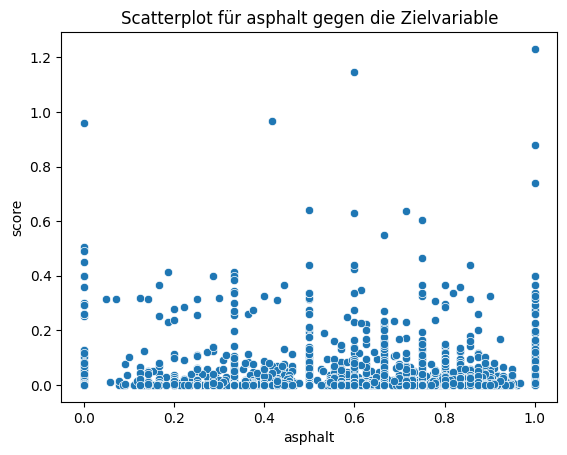

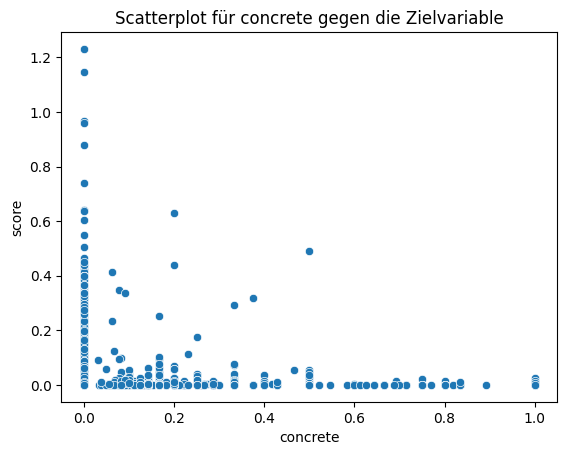

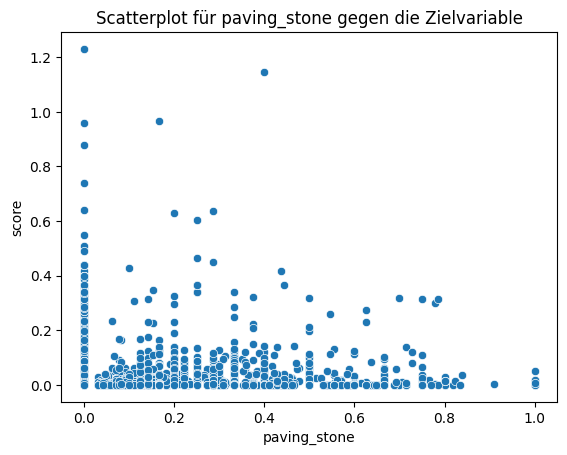

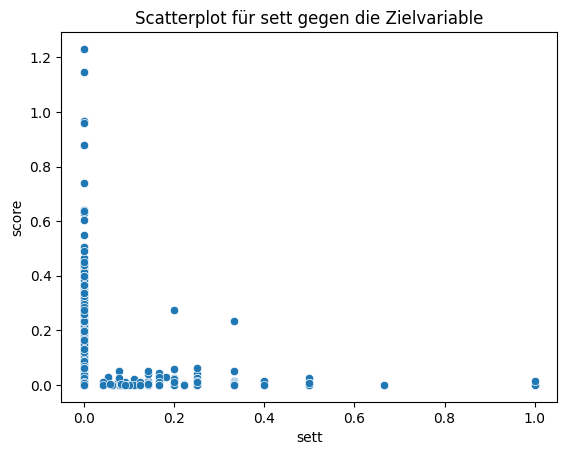

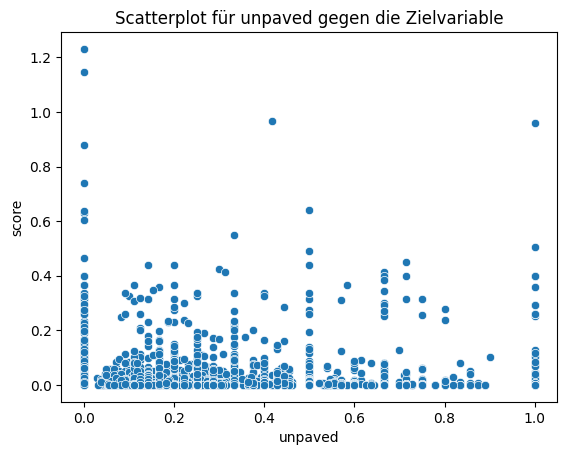

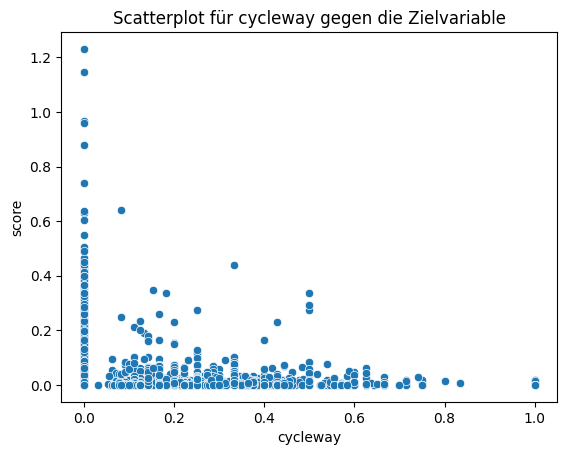

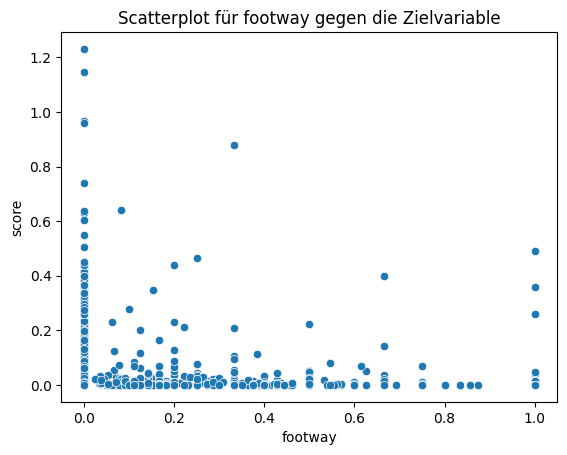

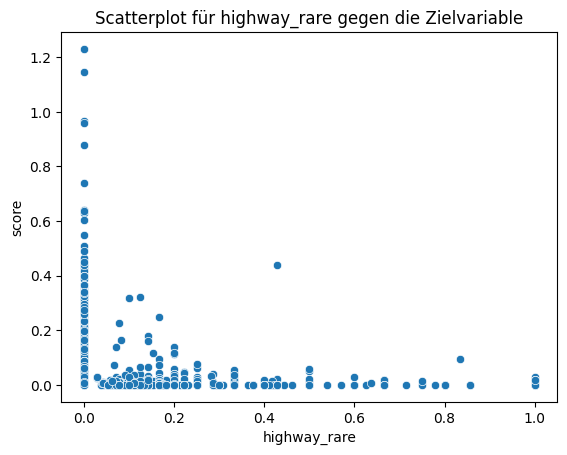

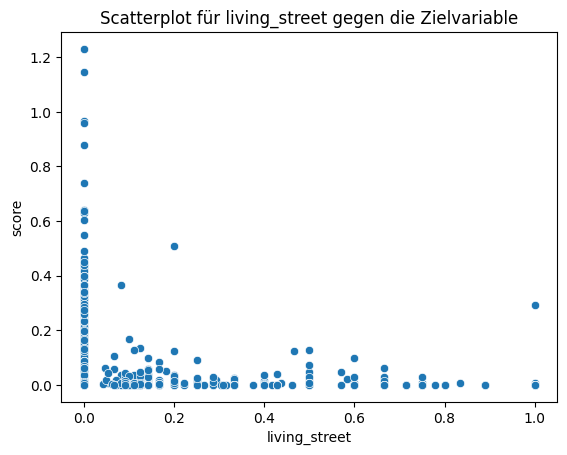

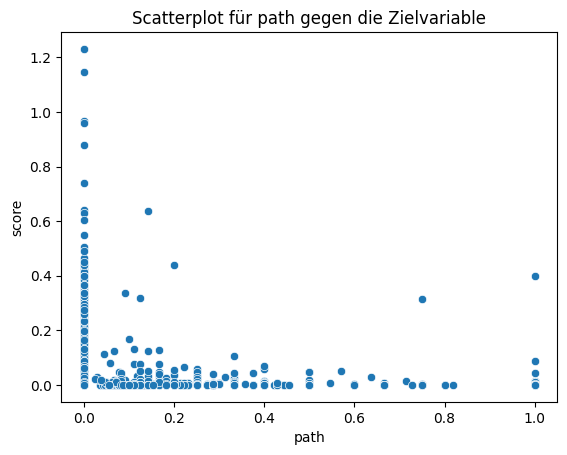

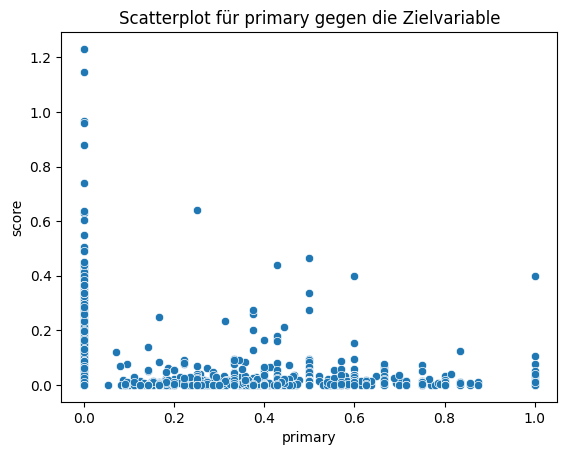

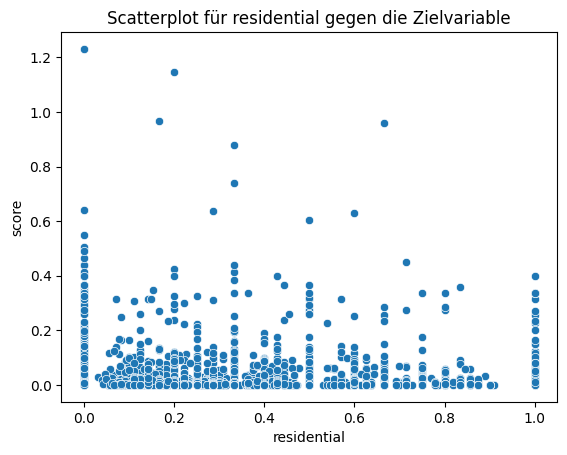

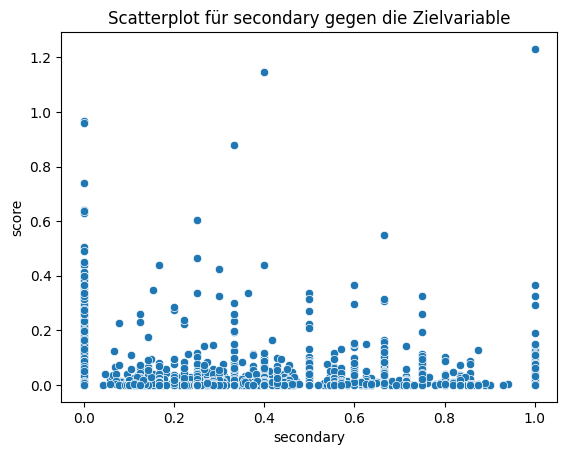

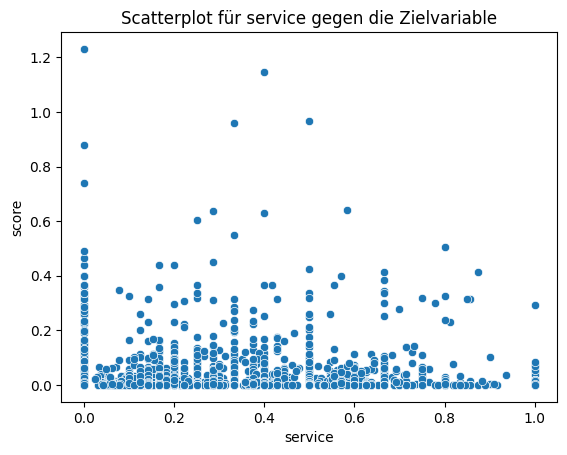

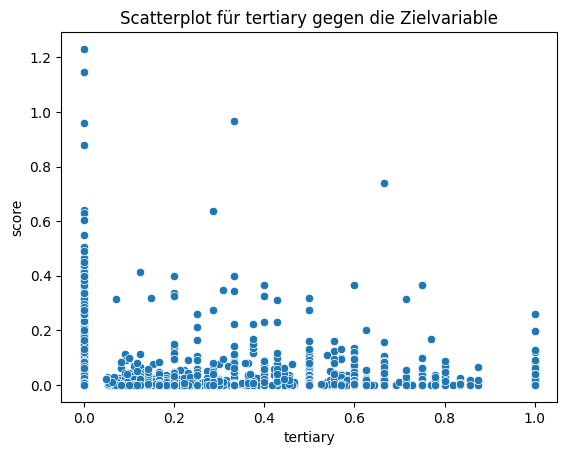

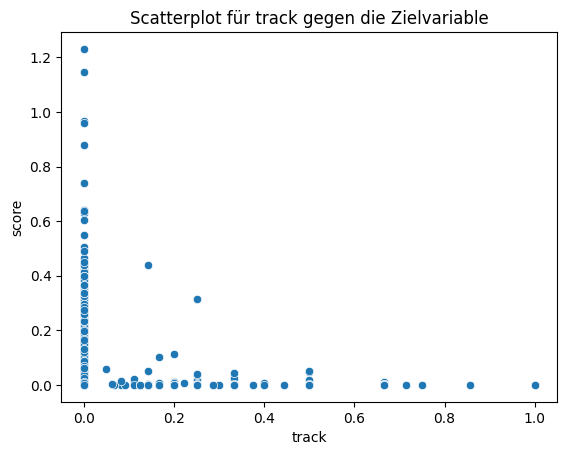

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

for feature in selected_features:
    sns.scatterplot(x=X_train[feature], y=y_train)
    plt.title(f'Scatterplot für {feature} gegen die Zielvariable')
    plt.show()


#### Cross-Validation mit reduziertem Modell
Führe eine Cross-Validation auf dem reduzierten Modell durch, um sicherzustellen, dass es stabil und robust ist.

In [146]:
cv_scores_reduced = cross_val_score(ridge_reduced, X_train_reduced, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_reduced = (-cv_scores_reduced) ** 0.5
print(f'Cross-validated RMSE des reduzierten Modells: {cv_rmse_reduced.mean()}')

Cross-validated RMSE des reduzierten Modells: 0.041530107333296463


#### Feinabstimmung der Hyperparameter
Falls die Feature-Reduktion das Modell verbessert hat, könntest du eine erneute Feinabstimmung der Hyperparameter durchführen, um das Modell weiter zu optimieren.

In [147]:
param_grid_reduced = {'alpha': [0.01, 0.1, 1.0, 10.0]}
grid_search_reduced = GridSearchCV(Ridge(), param_grid_reduced, cv=5, scoring='neg_mean_squared_error')
grid_search_reduced.fit(X_train_reduced, y_train)

print(f'Bestes alpha für reduziertes Modell: {grid_search_reduced.best_params_["alpha"]}')


Bestes alpha für reduziertes Modell: 10.0


## Visualisierung

In [149]:
import numpy as np
import matplotlib.pyplot as plt

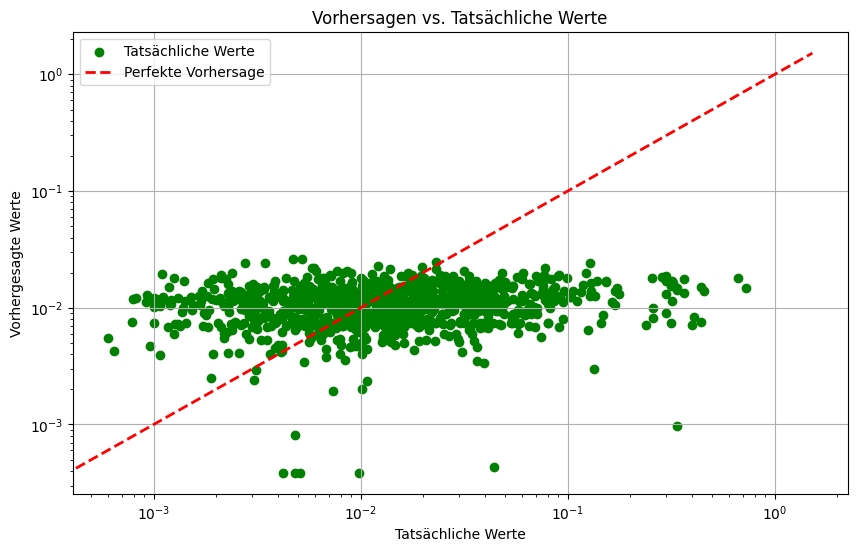

In [278]:
# Visualisierung der Vorhersagen vs. tatsächliche Werte
plt.figure(figsize=(10, 6))

# Scatterplot der tatsächlichen Werte vs. Vorhersagen
plt.scatter(y_test, y_pred, color='green', label='Tatsächliche Werte')

# Linie für perfekte Vorhersage
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Perfekte Vorhersage')

# Logarithmische Skalierung der Achsen
plt.xscale('log')
plt.yscale('log')

# Beschriftungen und Legende
plt.xlabel('Tatsächliche Werte')
plt.ylabel('Vorhergesagte Werte')
plt.title('Vorhersagen vs. Tatsächliche Werte')
plt.legend()
plt.grid(True)
plt.show()